# Data Validation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned dataset to check the data and prepare for validation

clean_data1 = pd.read_csv('../Data/clean_data.csv')

# Display the first few rows of the dataset to understand its structure

clean_data1.head()

,league,team,season,revenue,spent,competition,position,wins,ties,losses,...,log_league_spent,log_relative,log_relative_winsorized,net_cube_root,sqrt_goals_for,sqrt_goals_against,log_5_season_agg,winsorized_5_season_net,log_5_season_league_agg,log_5_season_relative
0,England,Manchester City,23,162.17,155.00,First Tier,1,28,5,5,...,8.039480,0.048790,0.048790,1.928293,9.695360,5.744563,6.574671,-169.94,9.191259,0.070419
1,England,Manchester City,22,93.80,138.90,First Tier,1,29,6,3,...,7.444833,0.078097,0.078097,-3.559526,9.949874,5.099020,6.779024,-169.94,9.092795,0.094206
2,England,Manchester City,21,64.00,173.40,First Tier,1,27,5,6,...,7.365813,0.104132,0.104132,-4.782692,9.110434,5.656854,6.863344,-169.94,9.088286,0.102532
3,England,Manchester City,20,71.00,169.82,First Tier,2,26,3,9,...,7.490529,0.090637,0.090637,-4.623260,10.099505,5.916080,6.899350,-169.94,9.074635,0.107485
4,England,Manchester City,19,57.60,78.59,First Tier,1,32,2,4,...,7.396949,0.047088,0.047088,-2.758486,9.746794,4.795832,6.829372,-169.94,9.008347,0.107103


## 1. Check for Missing and Duplicate Values

In [3]:
def print_dataframe_summary(df: pd.DataFrame):
    # Calculate the number of rows and columns
    n_rows = df.shape[0]
    n_columns = df.shape[1]
    
    # Calculate the total size (number of elements)
    total_elements = df.size
    
    # Calculate the total number of NaN values
    total_nan = df.isna().sum().sum()
    
    # Calculate the percentage of NaN values
    nan_percentage_total = (total_nan / total_elements) * 100
    
    # Identify numeric and categorical columns
    num_columns = df.select_dtypes(include=['number']).columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Calculate NaN values and percentages for numeric and categorical columns
    num_nan = df[num_columns].isna().sum().sum()
    num_nan_percentage = (num_nan / df[num_columns].size) * 100 if len(num_columns) > 0 else 0
    
    cat_nan = df[cat_columns].isna().sum().sum()
    cat_nan_percentage = (cat_nan / df[cat_columns].size) * 100 if len(cat_columns) > 0 else 0
    
    # Calculate the number of duplicate rows
    n_duplicates = df.duplicated().sum()
    
    # Display the information
    print("===== DataFrame Summary =====\n")
    print(f"Number of rows: {n_rows}")
    print(f"Number of columns: {n_columns}")
    print(f"Total size (number of elements): {total_elements}")
    print(f"Total number of NaN values: {total_nan} ({nan_percentage_total:.2f} %)")
    print(f"Total numeric columns: {len(num_columns)} ({num_nan_percentage:.2f} % NaN)")
    print(f"Total categorical columns: {len(cat_columns)} ({cat_nan_percentage:.2f} % NaN)")
    print(f"Number of duplicate rows: {n_duplicates}\n")
    print("=============================")

print_dataframe_summary(clean_data1)

===== DataFrame Summary =====

Number of rows: 3172
Number of columns: 32
Total size (number of elements): 101504
Total number of NaN values: 0 (0.00 %)
Total numeric columns: 28 (0.00 % NaN)
Total categorical columns: 4 (0.00 % NaN)
Number of duplicate rows: 0



+ **Shape** : (**3172**,**32**)
+ There are **no missing values** in the dataset.
+ There are **no duplicate** rows in the dataset.

## 2. Check Data Types

In [4]:
def print_column_types_and_names(df: pd.DataFrame):
    # Title for the output
    print("===== DataFrame Column Information =====\n")
    
    # Identification of float columns
    float_cols = df.select_dtypes(include=['float64']).columns
    n_float_columns = len(float_cols)
    
    # Identification of integer columns
    int_cols = df.select_dtypes(include=['int64']).columns
    n_int_columns = len(int_cols)
    
    # Total numeric columns (float + int)
    total_numeric_columns = n_float_columns + n_int_columns
    
    # Display the total number of numeric columns
    print(f"=== Total numeric columns: {total_numeric_columns} ===\n")
    
    # Detail by column type for float columns
    if n_float_columns > 0:
        print(f"{n_float_columns} column(s) of type 'float64':\n")
        for col in float_cols:
            print(f"  - {col}")
        print()  # Blank line to separate types
    
    # Detail by column type for integer columns
    if n_int_columns > 0:
        print(f"{n_int_columns} column(s) of type 'int64':\n")
        for col in int_cols:
            print(f"  - {col}")
        print()  # Blank line to separate types
    
    # Identification of categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    n_categorical_columns = len(cat_cols)
    
    # Display the total number of categorical columns
    print(f"=== Total categorical columns: {n_categorical_columns} ===\n")
    
    # Detail by column type for categorical columns
    if n_categorical_columns > 0:
        print(f"{n_categorical_columns} column(s) of type 'object':\n")
        for col in cat_cols:
            print(f"  - {col}")
        print()  # Blank line to separate types
    
    print("=========================================")

print_column_types_and_names(clean_data1)

===== DataFrame Column Information =====

=== Total numeric columns: 28 ===

21 column(s) of type 'float64':

  - revenue
  - spent
  - league_spent
  - relative
  - net
  - 5_season_agg
  - 5_season_net
  - 5_season_league_agg
  - 5_season_relative
  - log_revenue
  - log_spent
  - log_league_spent
  - log_relative
  - log_relative_winsorized
  - net_cube_root
  - sqrt_goals_for
  - sqrt_goals_against
  - log_5_season_agg
  - winsorized_5_season_net
  - log_5_season_league_agg
  - log_5_season_relative

7 column(s) of type 'int64':

  - season
  - wins
  - ties
  - losses
  - goals_for
  - goals_against
  - first_tier

=== Total categorical columns: 4 ===

4 column(s) of type 'object':

  - league
  - team
  - competition
  - position



+ The data types appear **appropriate** for the **nature** of the data. 

# 3. Statistical Summary

In [5]:
# Step 4: Statistical Summary of the Dataset
statistical_summary = clean_data1.describe(include='all')

# Display the statistical summary
statistical_summary

,league,team,season,revenue,spent,competition,position,wins,ties,losses,...,log_league_spent,log_relative,log_relative_winsorized,net_cube_root,sqrt_goals_for,sqrt_goals_against,log_5_season_agg,winsorized_5_season_net,log_5_season_league_agg,log_5_season_relative
count,3172,3172,3172.000000,3172.000000,3172.000000,3172,3172,3172.000000,3172.000000,3172.000000,...,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000,3172.000000
unique,15,150,NaN,NaN,NaN,3,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Netherlands,FC Utrecht,NaN,NaN,NaN,First Tier,≤10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,240,24,NaN,NaN,NaN,2728,1067,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.188209,15.823082,19.406403,NaN,NaN,15.851198,8.463430,10.047289,...,4.507625,0.082401,0.075982,-0.142778,7.255835,6.285939,2.919754,-13.441619,6.001201,0.084261
std,NaN,NaN,6.839481,29.878338,38.371314,NaN,NaN,5.697620,3.067554,4.745989,...,1.531026,0.115530,0.094044,2.067766,1.138647,0.990918,2.015572,51.502980,1.526855,0.108685
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,2.000000,1.000000,0.000000,...,1.004302,0.000000,0.000000,-8.161459,3.605551,3.000000,0.000000,-169.940000,1.967811,0.000000
25%,NaN,NaN,6.000000,0.193750,0.150000,NaN,NaN,11.000000,6.000000,6.000000,...,3.327910,0.002626,0.002626,-1.667310,6.480741,5.656854,0.927029,-18.625000,4.827674,0.007652
50%,NaN,NaN,13.000000,3.550000,3.865000,NaN,NaN,15.000000,8.000000,10.000000,...,4.565805,0.037223,0.037223,0.000000,7.211103,6.324555,3.106826,0.410000,6.114898,0.043269
75%,NaN,NaN,18.000000,18.200000,20.500000,NaN,NaN,20.000000,10.000000,14.000000,...,5.763089,0.110914,0.110914,1.426043,8.000000,7.000000,4.576771,9.035000,7.252033,0.119236


+ **Categorical** Columns:

    + **`league`**: **15** unique leagues, with the most frequent being the **Netherlands** (**240** occurrences).
    + **`team`**: **150** unique teams, with **FC Utrecht** appearing the most frequently (**24** occurrences).
    + **`competition`**: **3** unique competitions, with "**First Tier**" being the most common (**2728** occurrences).
    + **`position`**: **10** unique positions, with the most frequent category being "**≤10**" (**1067** occurrences).

+ **Numeric** Columns:

    + **`season`**: Ranges from **0** to **23**, with an average value of approximately 12.
    + **`revenue`**: Varies from **0** to **367.25** million euros, with a **mean** of **15.82** million euros.
    + **`spent`**: Varies from **0** to **611.49** million euros, with a **mean** of **19.41** million euros.
    + **`wins`**, **`ties`**, **`losses`**: These metrics are within expected **ranges** for **football** seasons (e.g., **wins** range from **2** to **34**).
     

 
+ **Transformed** Columns:

    + The **transformed** columns (e.g., **`log_revenue`**, **`log_spent`**, **`sqrt_goals_for`**, etc.) all show a **reasonable spread** and **central tendency**, indicating that the **transformations** were **performed correctly**.

+ Overall, the summary indicates that the data appears to be **well-prepared**, with **no** immediate **anomalies**.

## 4. Correlation Analysis

In [6]:
# Calculating the correlation matrix
correlation_matrix = clean_data1.corr(numeric_only=True)

# Display the correlation matrix
correlation_matrix

,season,revenue,spent,wins,ties,losses,league_spent,relative,net,goals_for,...,log_league_spent,log_relative,log_relative_winsorized,net_cube_root,sqrt_goals_for,sqrt_goals_against,log_5_season_agg,winsorized_5_season_net,log_5_season_league_agg,log_5_season_relative
season,1.000000,0.247795,0.193549,0.041060,-0.080742,-0.051580,0.259927,-0.025189,-0.000770,0.055674,...,0.248854,-0.025541,-0.030793,0.085910,0.048736,-0.035189,0.154643,0.007965,0.296712,-0.039055
revenue,0.247795,1.000000,0.641518,0.319394,-0.045227,-0.194727,0.490688,0.240536,0.175992,0.325751,...,0.461443,0.264149,0.301333,0.209533,0.320291,-0.098992,0.568871,-0.192823,0.449109,0.262748
spent,0.193549,0.641518,1.000000,0.335682,-0.033837,-0.169998,0.699995,0.250169,-0.642233,0.335618,...,0.561196,0.283502,0.344454,-0.446648,0.327399,-0.074729,0.628301,-0.634603,0.538695,0.210942
wins,0.041060,0.319394,0.335682,1.000000,-0.356578,-0.741496,0.171364,0.429985,-0.111619,0.858021,...,0.163183,0.449607,0.473748,-0.110024,0.858319,-0.529370,0.466698,-0.262353,0.174468,0.502965
ties,-0.080742,-0.045227,-0.033837,-0.356578,1.000000,0.104895,0.123565,-0.223226,-0.001770,-0.237857,...,0.192071,-0.227886,-0.231769,0.011563,-0.216871,0.229608,0.004211,0.015140,0.204606,-0.239006
losses,-0.051580,-0.194727,-0.169998,-0.741496,0.104895,1.000000,0.051250,-0.428345,0.023575,-0.605837,...,0.038511,-0.446499,-0.470406,0.035169,-0.604164,0.801799,-0.293996,0.121510,0.029555,-0.499341
league_spent,0.259927,0.490688,0.699995,0.171364,0.123565,0.051250,1.000000,-0.072257,-0.407963,0.187047,...,0.766737,-0.057592,-0.032849,-0.298679,0.188606,0.130794,0.584614,-0.520084,0.740203,-0.068289
relative,-0.025189,0.240536,0.250169,0.429985,-0.223226,-0.428345,-0.072257,1.000000,-0.080681,0.408589,...,-0.090585,0.995096,0.931414,-0.131817,0.401765,-0.362114,0.392894,-0.097487,-0.093080,0.845943
net,-0.000770,0.175992,-0.642233,-0.111619,-0.001770,0.023575,-0.407963,-0.080681,1.000000,-0.105185,...,-0.259072,-0.099861,-0.140922,0.782531,-0.100094,-0.003018,-0.237840,0.621681,-0.242522,-0.008149
goals_for,0.055674,0.325751,0.335618,0.858021,-0.237857,-0.605837,0.187047,0.408589,-0.105185,1.000000,...,0.156403,0.426091,0.444424,-0.100742,0.994328,-0.231391,0.458038,-0.255157,0.164773,0.480965


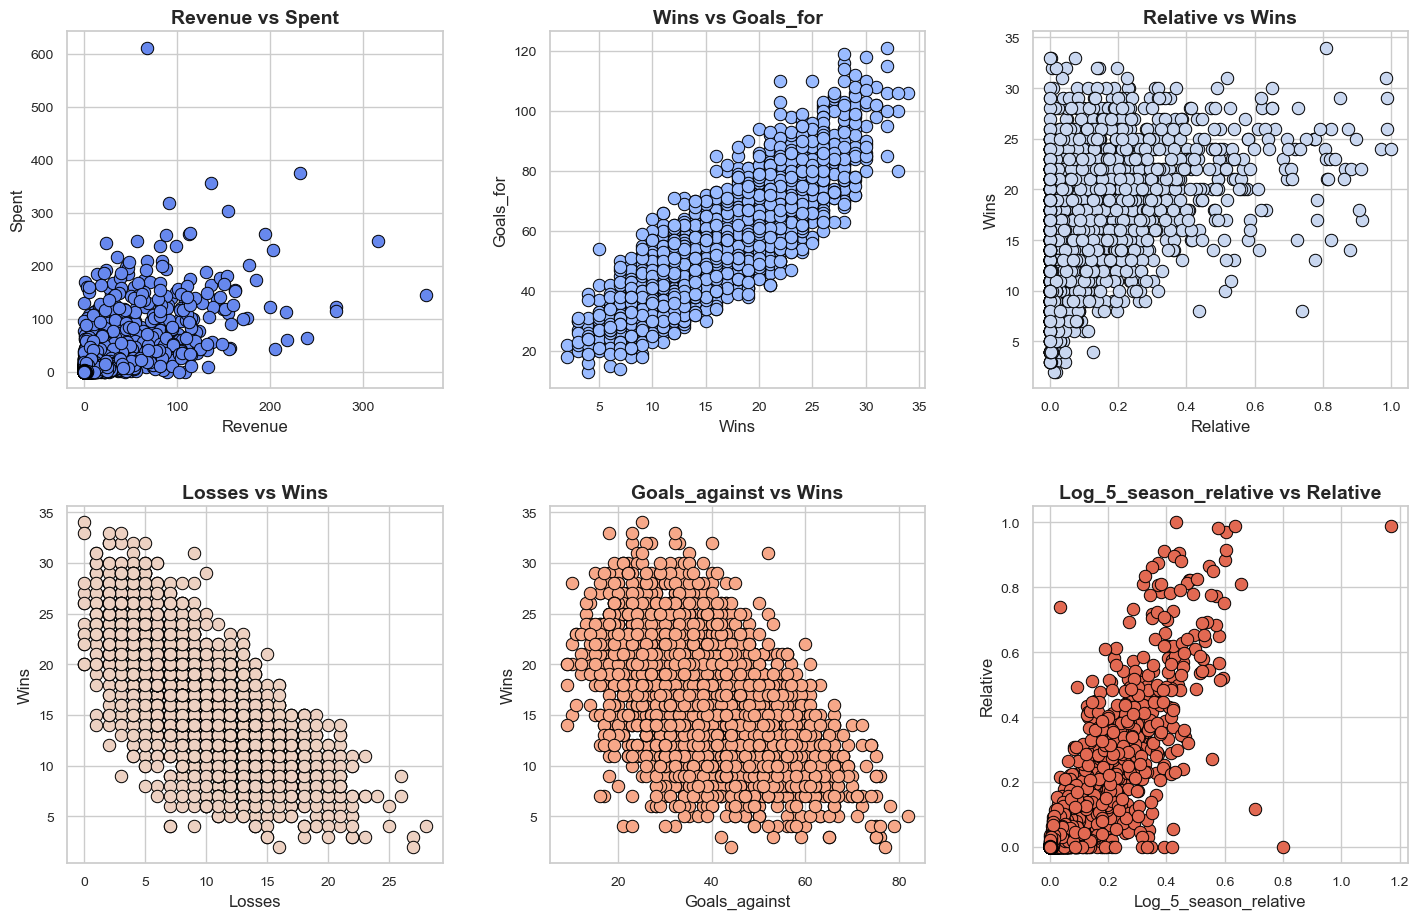

In [7]:
# Define the pairs of variables with strong correlations to visualize
correlation_pairs = [
    ('revenue', 'spent'),
    ('wins', 'goals_for'),
    ('relative', 'wins'),
    ('losses', 'wins'),
    ('goals_against', 'wins'),
    ('log_5_season_relative', 'relative')
]

# Set the color palette and style
sns.set(style="whitegrid")
colors = sns.color_palette("coolwarm", len(correlation_pairs))  # Generate a unique color for each plot

# Create scatter plots for each pair
plt.figure(figsize=(15, 10))

for i, (var1, var2) in enumerate(correlation_pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=clean_data1[var1], y=clean_data1[var2], color=colors[i-1], edgecolor="black", s=80)
    plt.title(f'{var1.capitalize()} vs {var2.capitalize()}', fontsize=14, fontweight='bold')
    plt.xlabel(var1.capitalize(), fontsize=12)
    plt.ylabel(var2.capitalize(), fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()

+ **Strong Correlations:**

    + **`revenue`** and **`spent`** have a **strong positive correlation** (**0.641**), indicating that higher revenue teams tend to spend more.
    + **`wins`** is **positively correlated** with **`goals_for`** (**0.858**), as expected since scoring more goals generally leads to more wins.
    + **`relative`** and **wins** have a significant **positive correlation** (**0.430**), suggesting that relative performance metrics are closely linked to wins.

+ **Negative Correlations:**

    + **`losses`** is **negatively correlated** with **`wins`** (**-0.741**), which is intuitive as more losses generally mean fewer wins.
    + **`goals_against`** is **negatively correlated** with `wins` (**-0.535**), indicating that conceding fewer goals is associated with winning more games.

+ **Transformed Metrics:**

    + **Log** and **transformed metrics** such as **`log_revenue`**, **`log_spent`**, and **`log_relative`** show **strong correlations** with their original counterparts, validating the consistency of transformations.

+ **Aggregated Metrics:**

    + The five-season aggregated metrics also show **meaningful correlations** with the corresponding single-season metrics, reflecting stability over time.

+ These **correlations** align well with the **expected relationships** between **financial** and **performance metrics** in football, suggesting that the data is consistent and valid for further analysis.

## 6. Summary

The **data validation** process indicates that the dataset is **well-prepared** and ready for **exploratory data analysis (EDA)**. **No** significant **issues** were identified that would require further cleaning or transformation. Therefore, the dataset **can be confidently used** to achieve the project's objectives, such as **analyzing financial efficiency and performance metrics of football teams across various European leagues**. And here is the summary of actions taken:

+ **Missing Values Check:**

We thoroughly checked for missing values across **all columns** in the dataset and found **none**. This confirms that the data is **complete**, with no need for imputation or removal of data points.

+ **Duplicates Check:**

We searched for duplicate rows in the dataset and found **none**, confirming that the dataset is **free from redundancy**, which is crucial for ensuring the integrity of the analysis.

+ **Data Types Check:**

We verified that all columns have appropriate data types: **categorical** variables are stored as **`category`**, and **numeric** variables (**`integers`** and **`floats`**) are correctly typed. This ensures the accuracy of subsequent statistical analyses and visualizations.

+ **Statistical Summary Review:**

We reviewed the statistical summary of the dataset, which showed **well-distributed** data with **expected ranges** for all metrics. **No anomalies** or **outliers** were **detected**, indicating that the data accurately reflects the financial and performance metrics of the football teams.

+ **Correlation Analysis:**

We performed a **correlation** analysis to identify and visualize **strong relationships** between **key variables**. The analysis revealed meaningful correlations between financial and performance metrics, confirming that the data is suitable for further exploration.

## 7. Conclusion

With the **data validation** process **complete**, the dataset is in an **optimal state** for conducting **exploratory data analysis (EDA)**. The **absence** of significant **issues** or **anomalies** means that we can confidently proceed with the project's objectives, such as analyzing **how financial spending correlates with team performance across different leagues**, **identifying patterns in financial efficiency over time**, and **comparing financial and performance metrics across European football leagues**.